# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [75]:
import time
import math
import multiprocessing
from multiprocessing import Pool
# using M1 Mac so initial code provided would not work
# get_context solution used from https://stackoverflow.com/questions/67999589/multiprocessing-with-pool-throws-error-on-m1-macbook
from multiprocessing import get_context
import functions
import sys
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = get_context("fork").Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    #print("Results", result)
    time_taken = int(time.time()-tp1)
    #print("Overall Time:", time_taken, "seconds")
    return time_taken
 

In [9]:
def my_func(x):
    s = math.sqrt(x)
    return s

In [10]:
# This verbose version shows which process in the pool is running each task. 
def my_func_verbose(x):
    s = math.sqrt(x)
    print("Task: ", multiprocessing.current_process(), x, s)
    return s

In [11]:
dataRange = range(10)

Use the pool_process function to apply my_func to the data in dataRange.  
This task is so light it requires very little processing time. 

In [15]:
pool_process(my_func_verbose, dataRange, 2)

Task: Task:   <ForkProcess name='ForkPoolWorker-5' parent=42461 started daemon><ForkProcess name='ForkPoolWorker-6' parent=42461 started daemon>  20  0.01.4142135623730951

Task: Task:   <ForkProcess name='ForkPoolWorker-5' parent=42461 started daemon><ForkProcess name='ForkPoolWorker-6' parent=42461 started daemon>  31  1.01.7320508075688772

Task: Task:   <ForkProcess name='ForkPoolWorker-6' parent=42461 started daemon><ForkProcess name='ForkPoolWorker-5' parent=42461 started daemon>  46  2.4494897427831782.0

Task: Task:   <ForkProcess name='ForkPoolWorker-6' parent=42461 started daemon><ForkProcess name='ForkPoolWorker-5' parent=42461 started daemon>  57  2.236067977499792.6457513110645907

Task:  <ForkProcess name='ForkPoolWorker-6' parent=42461 started daemon> 8 2.8284271247461903
Task:  <ForkProcess name='ForkPoolWorker-6' parent=42461 started daemon> 9 3.0
Results [0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.

In [16]:
pool_process(my_func, dataRange, 2)

Results [0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0]
Overall Time: 0 seconds


It is evident that the above functions are not complicated enough (i.e. they take very little time to execute) to warrant utilising extra cores. Therefore the naive prime checker below is introduced in order to quantify the speed-up from extra cores.

## A naive function for checking primes 

We note that we have not changed the check_prime function to be less naive as the ultimate goal in this assignment is to check the speed derived from using multiple cores, rather than actual efficiency.

In [92]:
%%capture prints
# using %%capture as we are not interested in the actual output from this function, merely the time taken to run
# the below results in the print statements being written to stderr instead 

def check_prime(num):
    warnings.filterwarnings("ignore")
    t1 = time.time()
    res = False
    if num > 0:
        # check for factors
        for i in range(2,num):
            if (num % i) == 0:
                #print(num,"is not a prime number", file=sys.stderr)
                #print(i,"times",num//i,"is",num, file=sys.stderr)
                #print("Time:", int(time.time()-t1), file=sys.stderr)
                break
        else:
            #print(num,"is a prime number", file=sys.stderr)
            #print("Time:", time.time()-t1, file=sys.stderr) 
            res = True
            # if input number is less than
            # or equal to 1, it is not prime
    #return res
    return

In [43]:
check_prime(7)

7 is a prime number
Time: 9.608268737792969e-05


True

In [25]:
check_prime(15488803)

15488803 is not a prime number
11 times 1408073 is 15488803
Time: 0


False

In [109]:
primes = [15484661,15484697,15484709,15484723,15484769,15484771,15484783,15484817,15484823,15484873,15484877,15484879,15484901,
         15484919,15484939,15484951,15484961,15484999,15485039,15485053,15485059,15485077,15485083,15485143,15485161,15485179,15485191,
         15485221,15485243,15485251,15485257,15485273,15485287,15485291,15485293,15485299]
print(len(primes))

36


In [79]:
# list of the number of cores, used for plotting times
corenumbers = [x for x in range(1,9)]

In [81]:
def mainfunc(numbers):
    times = []
    for cores in range(1,9):
        times.append(pool_process(check_prime, numbers, cores))
    return times

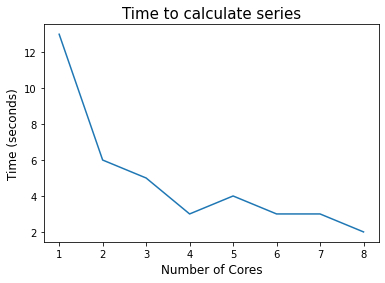

In [99]:
running_time = mainfunc(primes)
plt.plot(corenumbers, running_time)
plt.xlabel("Number of Cores", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.title("Time to calculate series", fontsize=15)
plt.show()

8
12
16
20
24
28
32
36


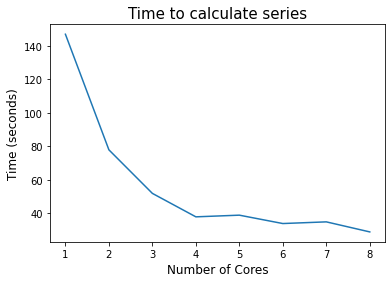

In [111]:
# create list of 8 0's to add running time to
running_time = [0 for x in range(1,9)]

# create lists of increasing lengths of the primes
for i in range(0,(len(primes)-7),4):
    prime_checks = primes[:(i+8)]
    print(len(prime_checks))
    times = mainfunc(prime_checks)
    for i in range(len(times)):
        running_time[i] += times[i]
                        
plt.plot(corenumbers, running_time)
plt.xlabel("Number of Cores", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.title("Time to calculate series", fontsize=15)
plt.show()